<a href="https://colab.research.google.com/github/nithya-sharma/British-Airways-Data-Science-virtual-experience-programme/blob/main/british_airways_Web_scraping_to_gain_company_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK-1**

**Web scraping**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 0 total reviews
Scraping page 2
   ---> 3 total reviews
Scraping page 3
   ---> 6 total reviews
Scraping page 4
   ---> 9 total reviews
Scraping page 5
   ---> 12 total reviews
Scraping page 6
   ---> 15 total reviews
Scraping page 7
   ---> 18 total reviews
Scraping page 8
   ---> 21 total reviews
Scraping page 9
   ---> 24 total reviews
Scraping page 10
   ---> 27 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We took off on time and arri...
1,Not Verified | BA changed our prepaid seats at...
2,✅ Trip Verified | Boarding was on time but wi...
3,✅ Trip Verified | We took off on time and arri...
4,Not Verified | BA changed our prepaid seats at...


In [4]:
df

,reviews
0,✅ Trip Verified | We took off on time and arri...
1,Not Verified | BA changed our prepaid seats at...
2,✅ Trip Verified | Boarding was on time but wi...
3,✅ Trip Verified | We took off on time and arri...
4,Not Verified | BA changed our prepaid seats at...
5,✅ Trip Verified | Boarding was on time but wi...
6,✅ Trip Verified | We took off on time and arri...
7,Not Verified | BA changed our prepaid seats at...
8,✅ Trip Verified | Boarding was on time but wi...
9,✅ Trip Verified | We took off on time and arri...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,We took off on time and arrived about 15 minu...
1,BA changed our prepaid seats at the last minu...
2,"Boarding was on time but with buses, welcome..."
3,We took off on time and arrived about 15 minu...
4,BA changed our prepaid seats at the last minu...
5,"Boarding was on time but with buses, welcome..."
6,We took off on time and arrived about 15 minu...
7,BA changed our prepaid seats at the last minu...
8,"Boarding was on time but with buses, welcome..."
9,We took off on time and arrived about 15 minu...


Cleaning the text

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...
1,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...
2,"Boarding was on time but with buses, welcome...",Boarding was on time but with buses welcome w...
3,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...
4,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...


In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...,"[(took, v), (time, n), (arrived, v), (minutes,..."
1,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."
2,"Boarding was on time but with buses, welcome...",Boarding was on time but with buses welcome w...,"[(Boarding, n), (time, n), (buses, n), (welcom..."
3,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...,"[(took, v), (time, n), (arrived, v), (minutes,..."
4,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...,"[(took, v), (time, n), (arrived, v), (minutes,...",take time arrive minute early Ground staff c...
1,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...
2,"Boarding was on time but with buses, welcome...",Boarding was on time but with buses welcome w...,"[(Boarding, n), (time, n), (buses, n), (welcom...",Boarding time bus welcome friendly tentative...
3,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...,"[(took, v), (time, n), (arrived, v), (minutes,...",take time arrive minute early Ground staff c...
4,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,We took off on time and arrived about 15 minu...,take time arrive minute early Ground staff c...
1,BA changed our prepaid seats at the last minu...,BA change prepaid seat last minute charge us...
2,"Boarding was on time but with buses, welcome...",Boarding time bus welcome friendly tentative...
3,We took off on time and arrived about 15 minu...,take time arrive minute early Ground staff c...
4,BA changed our prepaid seats at the last minu...,BA change prepaid seat last minute charge us...
5,"Boarding was on time but with buses, welcome...",Boarding time bus welcome friendly tentative...
6,We took off on time and arrived about 15 minu...,take time arrive minute early Ground staff c...
7,BA changed our prepaid seats at the last minu...,BA change prepaid seat last minute charge us...
8,"Boarding was on time but with buses, welcome...",Boarding time bus welcome friendly tentative...
9,We took off on time and arrived about 15 minu...,take time arrive minute early Ground staff c...


Sentiment Analysis using VADER

In [12]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.7 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...,"[(took, v), (time, n), (arrived, v), (minutes,...",take time arrive minute early Ground staff c...,0.7845,Positive
1,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.0000,Neutral
2,"Boarding was on time but with buses, welcome...",Boarding was on time but with buses welcome w...,"[(Boarding, n), (time, n), (buses, n), (welcom...",Boarding time bus welcome friendly tentative...,0.7351,Positive
3,We took off on time and arrived about 15 minu...,We took off on time and arrived about minutes...,"[(took, v), (time, n), (arrived, v), (minutes,...",take time arrive minute early Ground staff c...,0.7845,Positive
4,BA changed our prepaid seats at the last minu...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.0000,Neutral


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    18
Neutral      9
Name: Analysis, dtype: int64

Visualization

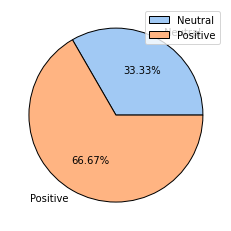

In [23]:
import seaborn as sns
soc = df.groupby('Analysis')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Analysis'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [17]:
df.to_csv("BA_reviews.csv")

**WORDCLOUD**

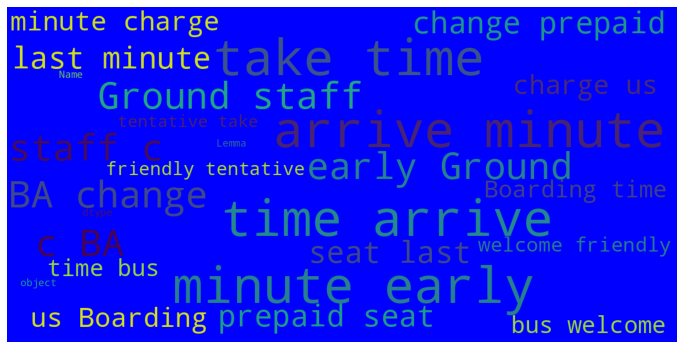

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='blue',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

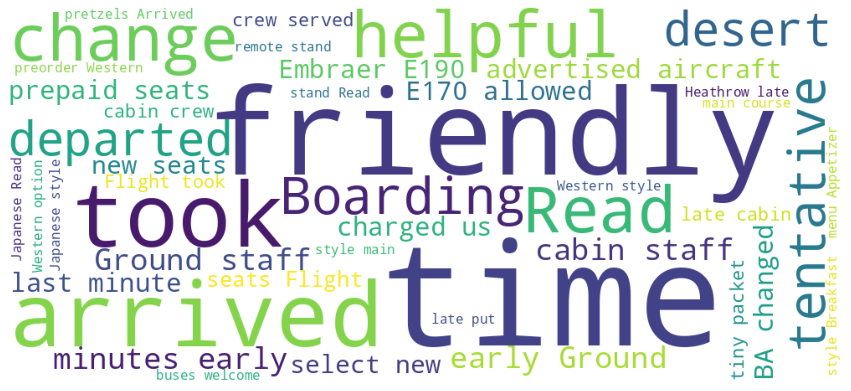

In [24]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()